In [22]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
lyrics_df1 = pd.read_csv('discography/queen_discography_allthelyrics.csv', sep='\t', encoding='utf-8')
lyrics_df1 = lyrics_df1[['song','album','lyrics']][lyrics_df1['lyrics'].notna()].reset_index().drop(['index'],axis=1)

len(lyrics_df1)

196

In [4]:
# limit = 50
limit = len(lyrics_df1)
key_list = list(lyrics_df1['song'])[:limit]
lyrics_list = list(lyrics_df1['lyrics'])[:limit]


In [7]:
import nltk
from nltk.tokenize import word_tokenize

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# Stemming is just the process of breaking a word down into its root.

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [10]:
#

def tokenize_and_stem(text, stopwords=stopwords, lang="english"):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text, stopwords, lang="english"):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens



In [11]:
totalvocab_stemmed = []
totalvocab_tokenized = []

for i in lyrics_list:
    allwords_stemmed = tokenize_and_stem(i, stopwords, "english")
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i, stopwords, "english")
    totalvocab_tokenized.extend(allwords_tokenized)
    
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print(vocab_frame.shape[0])

25445


# Tf-idf

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
# alternative way, with own list of stop words
# https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn

tfidf_vectorizer = TfidfVectorizer(
    max_features=200, 
    max_df=0.7, min_df=0.05, 
#     ngram_range=(1,1), 
    tokenizer=tokenize_and_stem, 
    stop_words=stopwords
)

tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics_list) # БЕРЕТСЯ ОРИГИНАЛЬНЫЙ ТЕКСТ, БЕЗ stemmed
# idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
terms = tfidf_vectorizer.get_feature_names_out()

print(tfidf_matrix.shape)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


(196, 200)


## Top of Bag of Words

In [14]:
tfidf_array = tfidf_matrix.todense()
tfidf_df = pd.DataFrame(tfidf_array)
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.040564,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.226311,...,0.0,0.0,0.000000,0.0,0.057072,0.000000,0.000000,0.000000,0.509857,0.0
1,0.0,0.000000,0.000000,0.041802,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.270891,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.047098,0.111023,0.095451,0.0
3,0.0,0.019991,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.107687,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.199819,0.0,0.083365,0.000000,0.000000,0.061876,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.095996,0.0
192,0.0,0.000000,0.093793,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.016374,0.019299,0.000000,0.0
193,0.0,0.063123,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.264124,...,0.0,0.0,0.000000,0.0,0.000000,0.118216,0.000000,0.000000,0.000000,0.0
194,0.0,0.058137,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.081795,0.000000,0.000000,0.000000,0.000000,0.0


In [15]:
# flags of occurance 
tfidf_flags_df = tfidf_df[list(tfidf_df)]
for col in list(tfidf_df):
    tfidf_flags_df[col] = np.sign(tfidf_flags_df[col])
# tfidf_flags_df

# frequency of features
feature_frequency = pd.DataFrame(np.sum(tfidf_flags_df)).rename(columns={0:'count'})
# feature_frequency

# russian words of features
terms_df = pd.DataFrame(terms).rename(columns={0:'token'})
# terms_df

# Top-20 of most frequent tokens
tfidf_feature_df = pd.concat([feature_frequency, terms_df], axis=1).sort_values(by='count', ascending=False)
tfidf_feature_df.head(20)

,count,token
116,133.0,n't
1,94.0,'m
104,91.0,love
197,87.0,yeah
59,84.0,get
124,83.0,oh
174,82.0,time
85,79.0,know
67,79.0,got
91,78.0,let


In [25]:
exceptions = ["n't", "'m", "yeah", "oh", "na", "ca"]

tfidf_feature_df[~tfidf_feature_df['token'].isin(exceptions)].head(20)

,count,token
104,91.0,love
59,84.0,get
174,82.0,time
85,79.0,know
67,79.0,got
91,78.0,let
28,76.0,come
62,75.0,go
167,70.0,take
146,70.0,say


## ...

In [17]:
from scipy.cluster.vq import kmeans, vq

In [19]:
num_clusters = 3
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

In [20]:
# terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:10])

['song', 'dream', "'m", 'tri', 'right', 'face', 'oh', 'love', 'never', 'say']
["n't", 'go', 'yeah', 'na', 'back', 'oh', 'got', 'time', 'babi', 'come']
['love', "n't", "'m", 'one', 'day', 'heart', 'oh', 'hear', 'live', 'need']


## the elbow method

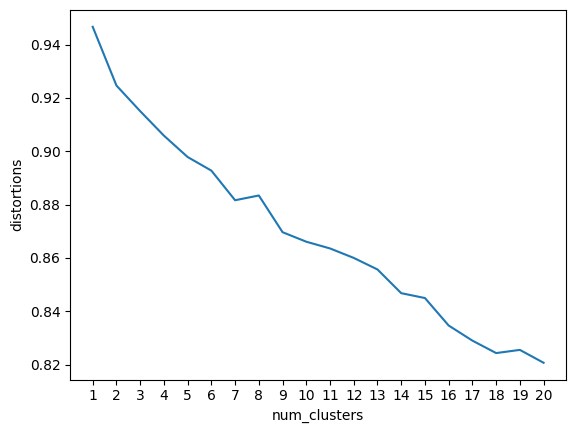

In [23]:
distortions = []
num_clusters_range = range(1, 21)

# Create a list of distortions from the kmeans method
for i in num_clusters_range:
    cluster_centers, distortion = kmeans(tfidf_matrix.todense(), i)
    distortions.append(distortion) 
    
# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters_range,
                           'distortions': distortions})
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters_range)
plt.show()

# ======== DRAFTS: